Sno - Серийный номер  
ObservationDate - Дата наблюдения в ММ/ДД/ГГГГ  
Province/State - Провинция или штат наблюдения (может быть пустым, если отсутствует)  
Country/Region - Страна наблюдения  
Last Update - время в формате UTC, когда строка обновляется для данной провинции или страны. (Не стандартизирован и поэтому, пожалуйста, очистите его перед использованием)  
Confirmed - Совокупное количество подтвержденных случаев до этой даты  
Deaths - Совокупное число смертей до этой даты  
Recovered -  Совокупное количество восстановленных случаев до этой даты  

In [53]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt

import missingno as miss

import seaborn as sns

%matplotlib inline

# read data

In [54]:
df = pd.read_csv('data/covid_19_data.csv')

In [55]:
df_conf = pd.read_csv('data/time_series_covid_19_confirmed.csv')

In [56]:
df_dead = pd.read_csv('data/time_series_covid_19_deaths.csv')

In [57]:
df_recover = pd.read_csv('data/time_series_covid_19_recovered.csv')

In [58]:
df[:3]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0


In [59]:
df.shape

(306429, 8)

In [60]:
df_conf.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456


In [61]:
df_conf.shape

(276, 498)

In [62]:
df_dead.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460


In [63]:
df_dead.shape

(276, 498)

In [64]:
df_recover[:3]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,87902,88066,88208,88346,88497,88672,88861,89040,89232,89419


In [65]:
df_recover.shape

(261, 498)

# columns lower and replace df

In [66]:
df.columns = [i.replace('/', '').replace(' ', '').lower() for i in df.columns]
df_conf.columns = [i.lower() for i in df_conf.columns]
df_dead.columns = [i.lower() for i in df_dead.columns]
df_recover.columns = [i.lower() for i in df_recover.columns]

In [67]:
df.set_index('sno', inplace=True)

# see data

## df

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306429 entries, 1 to 306429
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   observationdate  306429 non-null  object 
 1   provincestate    228329 non-null  object 
 2   countryregion    306429 non-null  object 
 3   lastupdate       306429 non-null  object 
 4   confirmed        306429 non-null  float64
 5   deaths           306429 non-null  float64
 6   recovered        306429 non-null  float64
dtypes: float64(3), object(4)
memory usage: 18.7+ MB


In [69]:
df_drop = df.loc[df['provincestate'].isna()]

In [70]:
# df.drop(df_drop.index, axis=0,inplace=True)

In [71]:
df.describe()

,confirmed,deaths,recovered
count,3.064290e+05,306429.000000,3.064290e+05
mean,8.567091e+04,2036.403268,5.042029e+04
std,2.775516e+05,6410.938048,2.015124e+05
min,-3.028440e+05,-178.000000,-8.544050e+05
25%,1.042000e+03,13.000000,1.100000e+01
50%,1.037500e+04,192.000000,1.751000e+03
75%,5.075200e+04,1322.000000,2.027000e+04
max,5.863138e+06,112385.000000,6.399531e+06


In [72]:
# df['observationdate'].to_datetime( format="%m/%d/%Y")
df['date'] = pd.to_datetime(df.observationdate)

In [73]:
df.lastupdate = pd.to_datetime(df.lastupdate)

In [74]:
df.drop('observationdate', 1, inplace=True)

In [75]:
df = df[['date','lastupdate', 'provincestate', 'countryregion', 'confirmed', 'deaths','recovered']]

In [76]:
df[:5]

,date,lastupdate,provincestate,countryregion,confirmed,deaths,recovered
sno,,,,,,,
1,2020-01-22,2020-01-22 17:00:00,Anhui,Mainland China,1.0,0.0,0.0
2,2020-01-22,2020-01-22 17:00:00,Beijing,Mainland China,14.0,0.0,0.0
3,2020-01-22,2020-01-22 17:00:00,Chongqing,Mainland China,6.0,0.0,0.0
4,2020-01-22,2020-01-22 17:00:00,Fujian,Mainland China,1.0,0.0,0.0
5,2020-01-22,2020-01-22 17:00:00,Gansu,Mainland China,0.0,0.0,0.0


In [77]:
dates = df_conf.columns[4:]
df_conf = df_conf.melt(
    id_vars=['province/state', 'country/region', 'lat', 'long'], 
    value_vars=dates, 
    var_name='date', 
    value_name='confirmed'
)
df_dead = df_dead.melt(
    id_vars=['province/state', 'country/region', 'lat', 'long'], 
    value_vars=dates, 
 var_name='date', 
 value_name='deaths'
)
df_recover = df_recover.melt(
    id_vars=['province/state', 'country/region', 'lat', 'long'], 
 value_vars=dates, 
 var_name='date', 
 value_name='recovered'
)

## df_conf

In [78]:
df_conf['provincestate'] = df_conf['province/state']
df_conf['countryregion'] = df_conf['country/region']

In [79]:
df_conf.drop(['country/region', 'province/state'],1, inplace=True)

In [80]:
df_conf['date'] = pd.to_datetime(df_conf['date'])

In [81]:
df_conf.head()

,lat,long,date,confirmed,provincestate,countryregion
0,33.93911,67.709953,2020-01-22,0,NaN,Afghanistan
1,41.15330,20.168300,2020-01-22,0,NaN,Albania
2,28.03390,1.659600,2020-01-22,0,NaN,Algeria
3,42.50630,1.521800,2020-01-22,0,NaN,Andorra
4,-11.20270,17.873900,2020-01-22,0,NaN,Angola


# df_dead

In [82]:
df_dead['provincestate'] = df_dead['province/state']
df_dead['countryregion'] = df_dead['country/region']

In [83]:
df_dead.drop(['country/region', 'province/state'],1, inplace=True)

In [84]:
df_dead['date'] = pd.to_datetime(df_dead['date'])

In [85]:
df_dead.head()

,lat,long,date,deaths,provincestate,countryregion
0,33.93911,67.709953,2020-01-22,0,NaN,Afghanistan
1,41.15330,20.168300,2020-01-22,0,NaN,Albania
2,28.03390,1.659600,2020-01-22,0,NaN,Algeria
3,42.50630,1.521800,2020-01-22,0,NaN,Andorra
4,-11.20270,17.873900,2020-01-22,0,NaN,Angola


# df_recover

In [86]:
df_recover['provincestate'] = df_recover['province/state']
df_recover['countryregion'] = df_recover['country/region']

In [87]:
df_recover.drop(['country/region', 'province/state'],1, inplace=True)

In [88]:
df_recover['date'] = pd.to_datetime(df_recover['date'])

In [89]:
df_recover.head()

,lat,long,date,recovered,provincestate,countryregion
0,33.93911,67.709953,2020-01-22,0,NaN,Afghanistan
1,41.15330,20.168300,2020-01-22,0,NaN,Albania
2,28.03390,1.659600,2020-01-22,0,NaN,Algeria
3,42.50630,1.521800,2020-01-22,0,NaN,Andorra
4,-11.20270,17.873900,2020-01-22,0,NaN,Angola


In [90]:
df_recover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128934 entries, 0 to 128933
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   lat            128440 non-null  float64       
 1   long           128440 non-null  float64       
 2   date           128934 non-null  datetime64[ns]
 3   recovered      128934 non-null  int64         
 4   provincestate  34580 non-null   object        
 5   countryregion  128934 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 5.9+ MB


# Merge

In [91]:
# Merging confirmed_df_long and deaths_df_long
full_table = df_conf.merge(
 right= df_dead, 
 how='left',
 on=['provincestate', 'countryregion', 'date', 'lat', 'long']
)
# Merging full_table and recovered_df_long
full_table = full_table.merge(
 right=df_recover, 
 how='left',
 on=['provincestate', 'countryregion', 'date', 'lat', 'long']
)

In [92]:
full_table.columns

Index(['lat', 'long', 'date', 'confirmed', 'provincestate', 'countryregion',
       'deaths', 'recovered'],
      dtype='object')

In [93]:
full_table = full_table[['lat', 'long', 'date', 'provincestate', 'countryregion', 'confirmed', 'deaths', 'recovered']]

In [94]:
full_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136344 entries, 0 to 136343
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   lat            135356 non-null  float64       
 1   long           135356 non-null  float64       
 2   date           136344 non-null  datetime64[ns]
 3   provincestate  42484 non-null   object        
 4   countryregion  136344 non-null  object        
 5   confirmed      136344 non-null  int64         
 6   deaths         136344 non-null  int64         
 7   recovered      125970 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 9.4+ MB


In [95]:
full_table['recovered'].fillna(0, inplace=True)

In [96]:
df_drop = full_table.loc[full_table['long'].isna()]

In [97]:
full_table.drop(df_drop.index, 0, inplace=True)

In [98]:
# Active Case = confirmed - deaths - recovered
full_table['active'] = full_table['confirmed'] - full_table['deaths'] - full_table['recovered']

In [99]:
full_table[:5]

,lat,long,date,provincestate,countryregion,confirmed,deaths,recovered,active
0,33.93911,67.709953,2020-01-22,NaN,Afghanistan,0,0,0.0,0.0
1,41.15330,20.168300,2020-01-22,NaN,Albania,0,0,0.0,0.0
2,28.03390,1.659600,2020-01-22,NaN,Algeria,0,0,0.0,0.0
3,42.50630,1.521800,2020-01-22,NaN,Andorra,0,0,0.0,0.0
4,-11.20270,17.873900,2020-01-22,NaN,Angola,0,0,0.0,0.0


In [102]:
full_table = full_table.sort_values(by= 'date')

In [103]:
full_table.head()

,lat,long,date,provincestate,countryregion,confirmed,deaths,recovered,active
0,33.939110,67.709953,2020-01-22,NaN,Afghanistan,0,0,0.0,0.0
176,4.210484,101.975766,2020-01-22,NaN,Malaysia,0,0,0.0,0.0
177,3.202800,73.220700,2020-01-22,NaN,Maldives,0,0,0.0,0.0
178,17.570692,-3.996166,2020-01-22,NaN,Mali,0,0,0.0,0.0
179,35.937500,14.375400,2020-01-22,NaN,Malta,0,0,0.0,0.0


In [105]:
full_table.tail()

,lat,long,date,provincestate,countryregion,confirmed,deaths,recovered,active
136158,24.974000,101.487000,2021-05-29,Yunnan,China,352,2,331.0,19.0
136157,41.112900,85.240100,2021-05-29,Xinjiang,China,980,3,977.0,0.0
136155,31.692700,88.092400,2021-05-29,Tibet,China,1,0,1.0,0.0
136162,-0.228000,15.827700,2021-05-29,NaN,Congo (Brazzaville),11658,153,8208.0,3297.0
136343,-19.015438,29.154857,2021-05-29,NaN,Zimbabwe,38933,1594,36578.0,761.0


# Null

<AxesSubplot:>

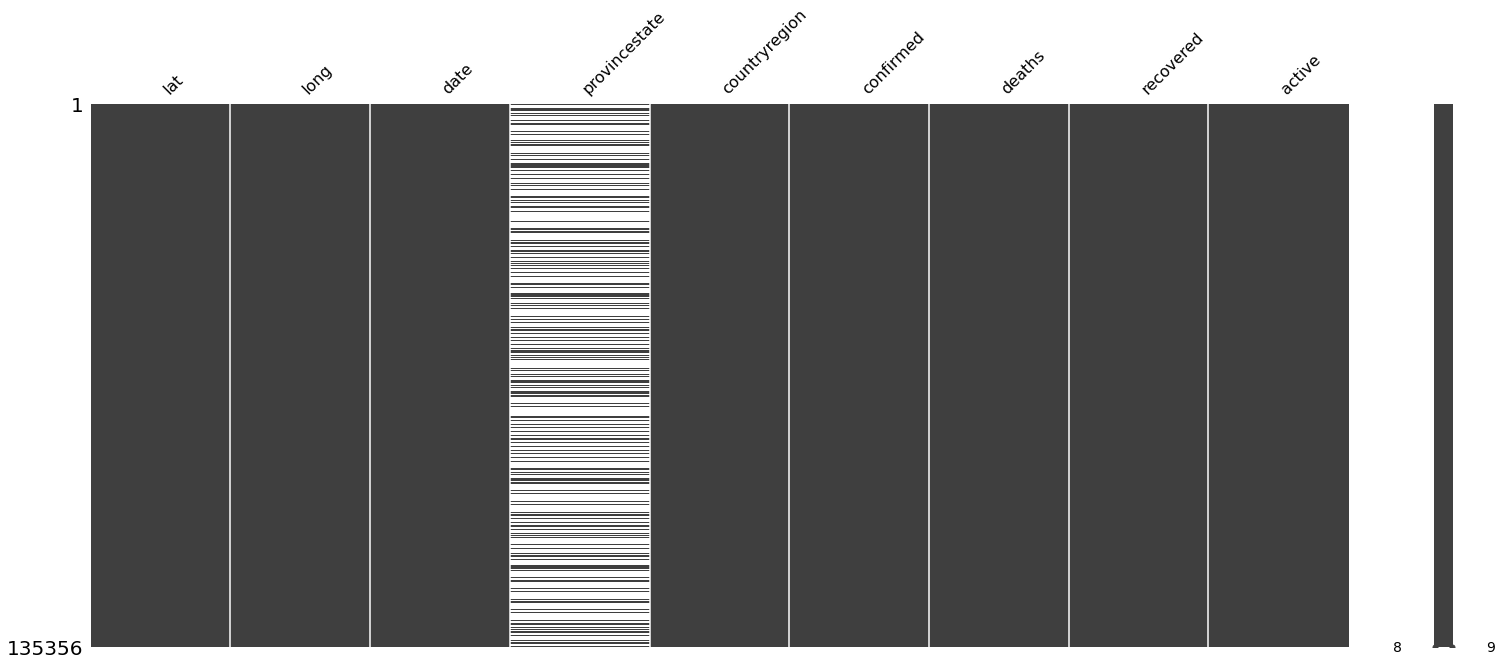

In [107]:
miss.matrix(full_table)

In [109]:
full_table.to_csv('full_table.csv')